# 1. Imports

1.1 Enable local referencing

In [1]:
import sys
sys.path.append('/Users/alexten/Projects/PDP/')

1.2 Import external modules

In [2]:
import numpy
import tensorflow as tf
print('tensorflow version {}'.format(tf.__version__))

tensorflow version 0.10.0rc0


1.3 Import local modules

In [3]:
import FFBP.utilities.evaluation_functions as evalf
import FFBP.utilities.activation_functions as actf
import FFBP.utilities.error_functions as errf
from FFBP.constructors.DataSet import load_data
from FFBP.constructors.Network import Network
from FFBP.constructors.Layer import Layer
from FFBP.utilities.model import model

# 2. Cosnstruction

2.1 Load data

In [4]:
trainSet = load_data('ex_XOR/f_XOR.txt')
testSet = trainSet

2.2 Build the network

In [5]:
image = tf.placeholder(tf.float32, shape=[None,2], name='input')
label = tf.placeholder(tf.float32, shape=[None,1], name='target')

hidden1 = Layer(input_tensor = image,
                size = 2,
                wrange = [-1,1],
                act = actf.sigmoid,
                layer_name = 'hidden1',
                seed = 9)

output =  Layer(input_tensor = hidden1.act,
                size = 1,
                wrange = [-1,1],
                act = actf.sigmoid,
                layer_name = 'output',
                seed = 2)

xor = model([image], [hidden1, output], label)
mynet = Network(xor, name='XOR Network')

# 3. Setup, Initialize / Restore

In [8]:
mynet.init_weights()
mynet.restore('ex_XOR/xor_params.ckpt')
mynet.configure(loss = errf.squared_error,
                train_batch_size = 4,
                test_batch_size = 4,
                learning_rate = 0.5,
                momentum = 0.9,
                test_func = evalf.tss,
                test_scope = 'all')

# 4. Run session

4.1. Fast test and train mode

In [8]:
mynet.tnt(330, trainSet, testSet, snp_checkpoint=30, tf_checkpoint=330)

[XOR Network] Now in train and test mode...
[XOR Network] epoch 0: 1.0506523847579956
[XOR Network] epoch 30: 1.0017900466918945
[XOR Network] epoch 60: 1.0000067949295044
[XOR Network] epoch 90: 0.9998869895935059
[XOR Network] epoch 120: 0.9996618032455444
[XOR Network] epoch 150: 0.9985791444778442
[XOR Network] epoch 180: 0.9887511730194092
[XOR Network] epoch 210: 0.8967260122299194
[XOR Network] epoch 240: 0.6488262414932251
[XOR Network] epoch 270: 0.14681264758110046
[XOR Network] epoch 300: 0.024759607389569283
[XOR Network] Reached critical loss value on epoch 309
[309] Final error (epoch XOR Network): 0.019203651696443558
[XOR Network] Process terminated.


4.2. Interact mode


In [9]:
mynet.interact(train_set=trainSet, test_set=testSet)


[XOR Network] Now in interactive mode...
[XOR Network] Input your next action:
                • # of epochs to train
                • 't' to test
                • 'c' to train until ecrit is reached
                • 'q' to quit
#/t/c/q -> t
[XOR Network] Initial test...
[XOR Network] Error tensor [tss:0] = 1.0506523847579956
[XOR Network] Input your next action:
#/t/c/q -> 30
[XOR Network] Now training...
[XOR Network] Done training for 30/30 epochs (1.224 seconds)
[XOR Network] Input your next action:
#/t/c/q -> t
[XOR Network] Test after epoch 30:
[XOR Network] Error tensor |tss_1:0| = 1.0017900466918945
[XOR Network] Input your next action:
#/t/c/q -> 30
[XOR Network] Now training...
[XOR Network] Done training for 30/60 epochs (1.157 seconds)
[XOR Network] Input your next action:
#/t/c/q -> c
[XOR Network] Now training...
[XOR Network] Reached critical loss value on epoch 309
[XOR Network] Would you like to test before terminating the process?
y/n -> dsad
[XOR Network] Choose 

TypeError: test() got an unexpected keyword argument 'evalfun'

# 5. Visualize

<IPython.core.display.Javascript object>


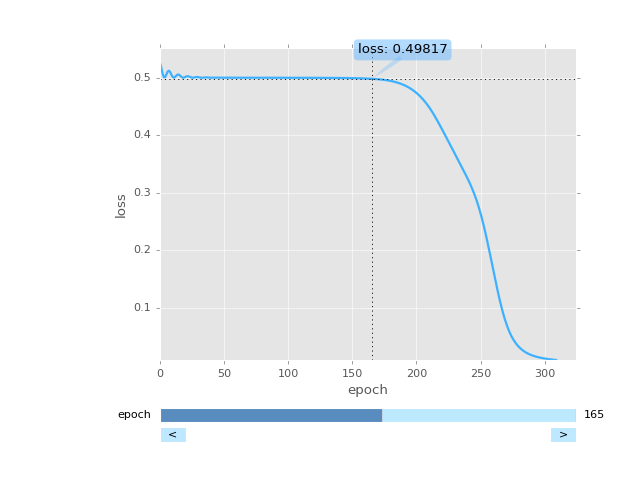

In [10]:
%matplotlib notebook
mynet.visualize_loss()

# -1. Close session

In [10]:
mynet.off()